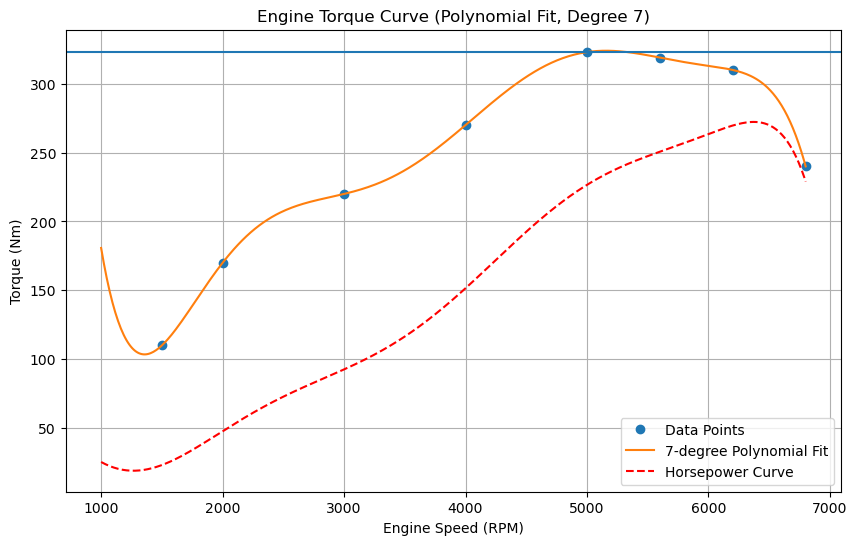

Coefficients of the fitted polynomial:
[-5.45308779e-22  1.55114047e-17 -1.81793665e-13  1.13053961e-09
 -4.00035760e-06  7.98830561e-03 -8.20363830e+00  3.43274813e+03]
"coefficient_0": 3432.748127325383,
"coefficient_1": -8.203638303539128,
"coefficient_2": 0.007988305605496984,
"coefficient_3": -4.000357599051101e-06,
"coefficient_4": 1.1305396098072905e-09,
"coefficient_5": -1.817936652154578e-13,
"coefficient_6": 1.5511404748844355e-17,
"coefficient_7": -5.453087794894265e-22,


In [301]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
points = np.array([
    [1500, 110],
    [2000, 170],
    [3000, 220],
    [4000, 270],
    [5000, 323],
    [5600, 319],
    [6200, 310],
    [6800, 240],
    
])
maxTq = 323
rpm = points[:, 0]
torque = points[:, 1]

degree = 7
coefficients = np.polyfit(rpm, torque, degree)

# Create the polynomial function using the coefficients
polynomial = np.poly1d(coefficients)

# Generate smooth RPM values for plotting the polynomial
rpm_smooth = np.linspace(rpm.min()-500, rpm.max(), 500)
torque_smooth = polynomial(rpm_smooth)

# Plot the data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.plot(rpm, torque, 'o', label="Data Points")
plt.plot(rpm_smooth, torque_smooth, '-', label=f"{degree}-degree Polynomial Fit")
hp_smooth = (torque_smooth * rpm_smooth) / 7127
plt.plot(rpm_smooth, hp_smooth, '--', label="Horsepower Curve", color="red")

plt.axhline(maxTq)  # Assuming the maximum torque is the maximum value in the dataset
plt.xlabel("Engine Speed (RPM)")
plt.ylabel("Torque (Nm)")
plt.title(f"Engine Torque Curve (Polynomial Fit, Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()

# Print the polynomial coefficients
print("Coefficients of the fitted polynomial:")
print(coefficients)

for i in range(len(coefficients)):
    print(f'"coefficient_{i}": {coefficients[len(coefficients)-i-1]},')


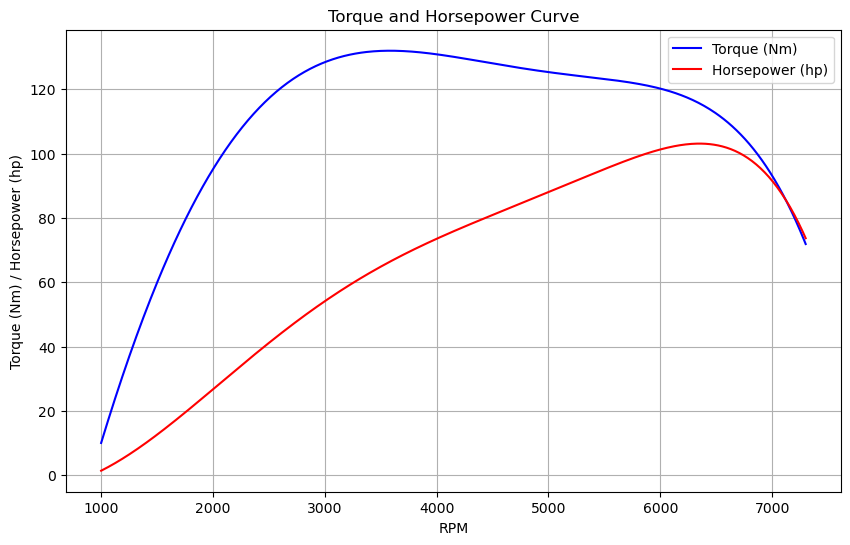

RPM = 1000, Torque = 10.04 Nm, Horsepower = 1.41 hp
RPM = 2000, Torque = 95.14 Nm, Horsepower = 26.72 hp
RPM = 3500, Torque = 131.92 Nm, Horsepower = 64.84 hp
RPM = 5000, Torque = 125.33 Nm, Horsepower = 88.00 hp
RPM = 6200, Torque = 117.99 Nm, Horsepower = 102.73 hp
RPM = 6500, Torque = 112.46 Nm, Horsepower = 102.65 hp
RPM = 7000, Torque = 93.14 Nm, Horsepower = 91.56 hp


In [302]:
import numpy as np
import matplotlib.pyplot as plt

def plot_poly_with_hp(coeff_dict, x_start, x_end, num_points=500):
    coeffs = [coeff_dict[f"coefficient_{i}"] for i in range(len(coeff_dict))]
    coeffs = coeffs[::-1]  # reverse order

    rpm = np.linspace(x_start, x_end, num_points)
    torque = np.polyval(coeffs, rpm)  # torque in Nm

    # Calculate horsepower
    power_watts = torque * (2 * np.pi * rpm) / 60
    horsepower = power_watts / 745.7

    plt.figure(figsize=(10,6))
    plt.plot(rpm, torque, label='Torque (Nm)', color='blue')
    plt.plot(rpm, horsepower, label='Horsepower (hp)', color='red')
    plt.xlabel('RPM')
    plt.ylabel('Torque (Nm) / Horsepower (hp)')
    plt.title('Torque and Horsepower Curve')
    plt.grid(True)
    plt.legend()
    plt.show()

    return coeffs

def evaluate_and_print(coeffs, x_values):
    y_values = np.polyval(coeffs, x_values)
    for xv, yv in zip(x_values, y_values):
        power_w = yv * (2 * np.pi * xv) / 60
        hp = power_w / 745.7
        print(f"RPM = {xv:.0f}, Torque = {yv:.2f} Nm, Horsepower = {hp:.2f} hp")

coefficients_dict = {
    "coefficient_0": -129.70158178131538,
"coefficient_1": 0.16020678409729522,
"coefficient_2": -1.3621974410854034e-05,
"coefficient_3": -8.822225195373026e-09,
"coefficient_4": 2.1149050231808504e-12,
"coefficient_5": -1.3583567501527848e-16,
}

coeffs = plot_poly_with_hp(coefficients_dict, 1000, 7300)

x_points = [1000, 2000, 3500, 5000, 6200, 6500, 7000]
evaluate_and_print(coeffs, x_points)
